In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.integrate import trapezoid
from scipy.stats import linregress

Analyzing battery data from B0005.mat...
Dictionary rebuilt. Keys available: dict_keys(['B0005.mat'])
Analyzing battery data from B0006.mat...
Dictionary rebuilt. Keys available: dict_keys(['B0005.mat', 'B0006.mat'])
Analyzing battery data from B0007.mat...
Dictionary rebuilt. Keys available: dict_keys(['B0005.mat', 'B0006.mat', 'B0007.mat'])
Analyzing battery data from B0018.mat...
Dictionary rebuilt. Keys available: dict_keys(['B0005.mat', 'B0006.mat', 'B0007.mat', 'B0018.mat'])


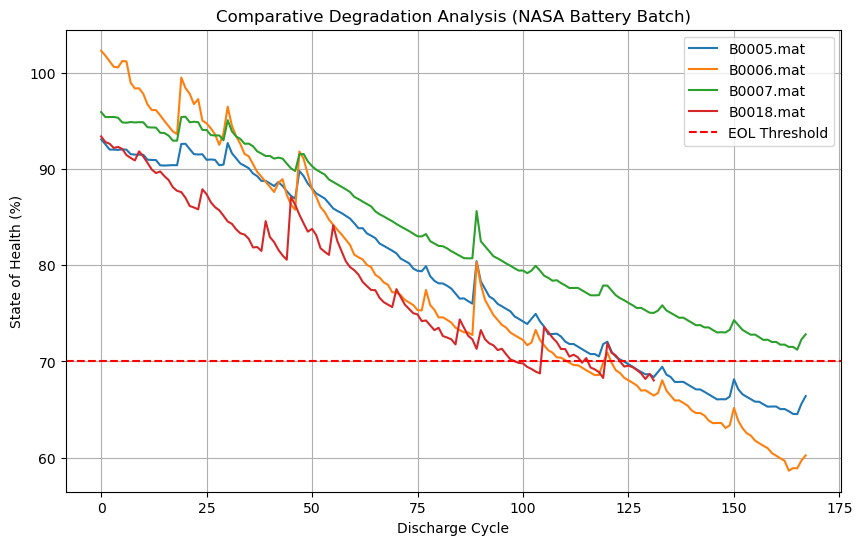

In [2]:
# Function to extract battery capacity and calculate SOH

def get_battery_capacity(B0005):
    print(f"Analyzing battery data from {B0005}...")

    # Load the .mat file and extract the relevant data
    mat_data = loadmat(B0005)
    battery_id = B0005.split('.')[0]
    raw_data = mat_data[battery_id]
    cycles = raw_data[0, 0]['cycle']

    # Identify discharge cycles and calculate SOH for each cycle
    discharge_indices = []
    for i in range(len(cycles[0])):
        if cycles[0][i]['type'][0] == 'discharge':
            discharge_indices.append(i)
    
    soh_history = []
    for idx in discharge_indices:
        cycle_data = cycles[0, idx]
        measurements = cycle_data['data'][0, 0]
        current = measurements['Current_measured'].flatten()
        time_sec = measurements['Time'].flatten()
        capacity = trapezoid(abs(current), time_sec) / 3600
        rated_capaity = 2
        soh = (capacity / rated_capaity) * 100
        soh_history.append(soh)
    return soh_history

# Comparative analysis of battery degradation across multiple batteries
results = {}
battery_files = ['B0005.mat', 'B0006.mat', 'B0007.mat', 'B0018.mat']

#plotting the results
plt.figure(figsize=(10, 6))
for f in battery_files:
    soh = get_battery_capacity(f)
    results[f] = soh
    print("Dictionary rebuilt. Keys available:", results.keys())
    plt.plot(soh, label=f)

plt.title("Comparative Degradation Analysis (NASA Battery Batch)")
plt.xlabel("Discharge Cycle")
plt.ylabel("State of Health (%)")
plt.axhline(y=70, color='red', linestyle='--', label='EOL Threshold')
plt.legend()
plt.grid(True)
plt.show()

Linear Regression for B0007.mat:
Degradation Rate: -0.1621 % per cycle
Current State of Health: 72.83%
Predicted End of Life Cycle: Cycle 166


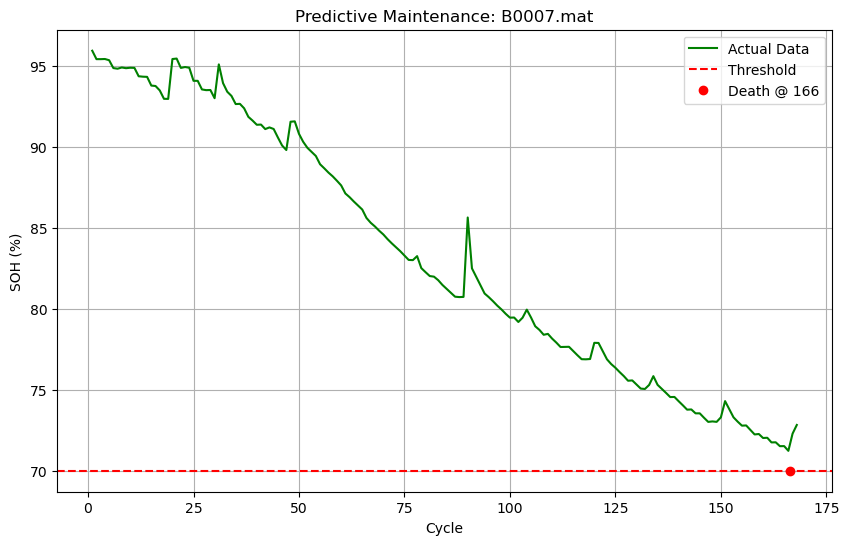

In [4]:
# Predictive maintenance for battery B0007
target_file = 'B0007.mat'
soh_data = results[target_file]
cycles = range(1, len(soh_data) + 1)
slope, intercept, r_value, p_value, std_err = linregress(cycles, soh_data)

# Predicting the end of life cycle based on the linear regression model
print(f"Linear Regression for {target_file}:")
print(f"Degradation Rate: {slope:.4f} % per cycle")
print(f"Current State of Health: {soh_data[-1]:.2f}%")
predicted_eol_cycle = (70 - intercept) / slope
print(f"Predicted End of Life Cycle: Cycle {int(predicted_eol_cycle)}")

# Visualize the predictive maintenance results
plt.figure(figsize=(10, 6))
plt.plot(cycles, soh_data, label='Actual Data', color = 'green')
future_cycles = list(range(1, 250))        # Extend the cycle range for better visualization of the prediction
plt.axhline(y=70, color='red', linestyle='--', label='Threshold')

# Mark the predicted death point
plt.plot(predicted_eol_cycle, 70, 'ro', label=f'Death @ {int(predicted_eol_cycle)}')

plt.title(f"Predictive Maintenance: {target_file}")
plt.xlabel("Cycle")
plt.ylabel("SOH (%)")
plt.legend()
plt.grid(True)
plt.show()